In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 确保matplotlib能够显示中文
mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# 确保matplotlib能够正常显示负号
mpl.rcParams["axes.unicode_minus"] = False
from mpl_toolkits import mplot3d

In [3]:
# 加载训练数据集
tds = np.loadtxt('dataset_多元线性回归.csv', delimiter=',', dtype='int', skiprows=1)
tds_x_1 = tds[:,0]
tds_x_2 = tds[:,1]
tds_y = tds[:,2]

# 标准化
std_tds_x_1 = (tds_x_1 - tds_x_1.mean()) / tds_x_1.std()
std_tds_x_2 = (tds_x_2 - tds_x_2.mean()) / tds_x_2.std()

train_x = np.vstack([np.ones(std_tds_x_1.shape[0]), std_tds_x_1, std_tds_x_2]).T
train_x

array([[ 1.        ,  1.39433428,  1.28478311],
       [ 1.        ,  1.11069026,  1.12482143],
       [ 1.        ,  0.09554325, -0.02399425],
       [ 1.        , -1.59139223, -1.59452708],
       [ 1.        , -0.8449606 , -0.76563476],
       [ 1.        ,  0.93154667,  1.05211158],
       [ 1.        , -1.38239138, -1.47819132],
       [ 1.        , -1.74067856, -1.69632088],
       [ 1.        ,  0.46875906,  0.48497472],
       [ 1.        ,  0.73747445,  0.77581413],
       [ 1.        , -0.11345761, -0.03853622],
       [ 1.        , -0.63595975, -0.62021505],
       [ 1.        , -0.36724436, -0.43116943],
       [ 1.        , -0.44188752, -0.32937564],
       [ 1.        ,  0.3045441 ,  0.36863896],
       [ 1.        ,  1.94669369,  1.9827977 ],
       [ 1.        ,  0.25975821,  0.1505094 ],
       [ 1.        ,  0.25975821,  0.19413531],
       [ 1.        , -1.23310505, -1.23097782],
       [ 1.        ,  0.84197488,  0.79035611]])

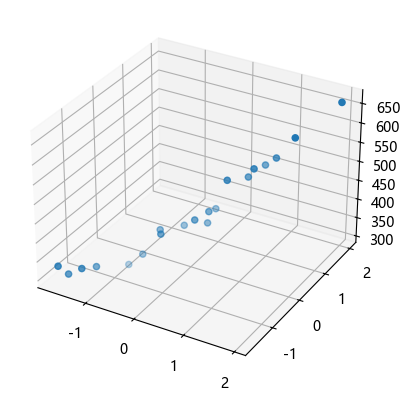

In [4]:
# 适用训练数据集绘制散点图看数据分布
ax = plt.axes(projection='3d')
ax.scatter(std_tds_x_1, std_tds_x_2, tds_y)

In [5]:
# 拟合直线函数
def f(theta, x):
    return np.dot(x, theta.T)

# 成本函数
def J(theta, train_x, tds_y):
    m = len(train_x)
    return np.sum(np.power(f(theta, train_x) - tds_y, 2)) / 2 / m

# 下面两个是偏导数
def pd_theta(theta, train_x, tds_y):
    m = len(train_x)
    return np.dot((f(theta, train_x) - tds_y), train_x) / m

In [6]:
eta = 5e-2
theta = np.array([0, 0, 0])
lst_iter_cnt = []
lst_cost = []
print(f(theta, train_x) - tds_y)
j_cost_cur = J(theta, train_x, tds_y)
for i in range(200):
    j_cost_pre = j_cost_cur
    tmp_theta = theta - eta * pd_theta(theta, train_x, tds_y)
    
    theta = tmp_theta
    
    j_cost_cur = J(theta, train_x, tds_y)
    
    lst_iter_cnt.append(i)
    lst_cost.append(j_cost_cur)
    
    print(i, theta, lst_cost[i])

[-591. -539. -413. -310. -308. -519. -325. -332. -498. -498. -392. -334.
 -385. -387. -425. -659. -400. -427. -319. -522.]
0 [21.4575      4.6739384   4.66619301] 87124.08049481029
1 [41.842125    8.88149512  8.86600538] 78349.64368329829
2 [61.20751875 12.66924582 12.64601276] 70492.67032706979
3 [79.60464281 16.07911483 16.0481395 ] 63451.95104950019
4 [97.08191067 19.14883967 19.1101231 ] 57138.37532501803
5 [113.68531514  21.91238915  21.86593237] 51473.32850094774
6 [129.45854938  24.40033974  24.3461438 ] 46387.32544230103
7 [144.44312191  26.64021438  26.57828031] 41818.842484955465
8 [158.67846582  28.65678739  28.58711623] 37713.31601098032
9 [172.20204253  30.47235898  30.39495176] 34022.28139302331
10 [185.0494404   32.10700231  32.02186007] 30702.630513346485
11 [197.25446838  33.57878594  33.48590971] 27715.969726701027
12 [208.84924496  34.90397397  34.80336479] 25028.063150660026
13 [219.86428271  36.09720628  35.98886518] 22608.348650981738
14 [230.32856858  37.17166071

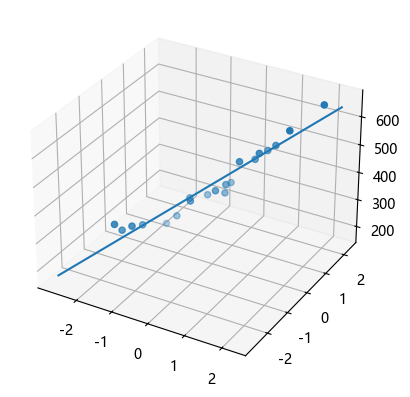

In [7]:
# 适用训练数据集绘制散点图看数据分布
ax = plt.axes(projection='3d')
ax.scatter(std_tds_x_1, std_tds_x_2, tds_y)
x_1 = np.arange(np.min(std_tds_x_1) - 1, np.max(std_tds_x_1) + 1, 1)
x_2 = np.arange(np.min(std_tds_x_2) - 1, np.max(std_tds_x_2) + 1, 1)
y = f(theta, np.vstack([np.ones(x_1.shape[0]), x_1, x_2]).T)
ax.plot(x_1, x_2, y)

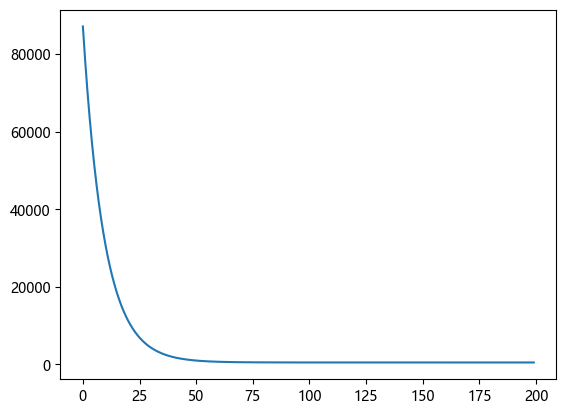

In [8]:
plt.plot(lst_iter_cnt, lst_cost)

In [9]:
# 以下的公式推导可自行思考
theta_not_scaled = [0] * 3
theta_not_scaled[0] = theta[0]
for i in range(1, 3):
    theta_not_scaled[i] = theta[i] / tds[:,i-1].std()
    theta_not_scaled[0] -= theta[i] * tds[:,i-1].mean() / tds[:,i-1].std()
print(theta_not_scaled)


def f_not_scaled2(theta_not_scaled, x_1, x_2):
    return np.dot([1, x_1, x_2], theta_not_scaled.T)

print("x1为198、x2为296时，y的预测值：", f_not_scaled2(np.array(theta_not_scaled), 198, 296))

[167.02316616851462, 0.7095219413757319, 0.6689157214192475]
x1为198、x2为296时，y的预测值： 505.5075641010068


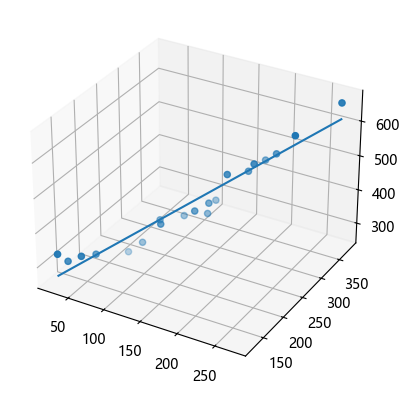

In [10]:
ax = plt.axes(projection='3d')
ax.scatter(tds_x_1, tds_x_2, tds_y)
x_1 = np.linspace(np.min(tds_x_1), np.max(tds_x_1), 100)
x_2 = np.linspace(np.min(tds_x_2), np.max(tds_x_2), 100)
y = f(np.array(theta_not_scaled), np.vstack([np.ones(x_1.shape[0]), x_1, x_2]).T)
ax.plot(x_1, x_2, y)